<a href="https://colab.research.google.com/github/palak0503/D3KWK/blob/main/Uterine_Sarcoma(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# **Data Processing**

In [3]:
df = pd.read_csv("/Copy of uterine sarcomas_miRNA.csv")
header=0
df.head()
df.columns



Index(['Condition', 'MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064',
       'MIMAT0000065', 'MIMAT0000066', 'MIMAT0000067', 'MIMAT0000068',
       'MIMAT0000069', 'MIMAT0000070',
       ...
       'MIMAT0031893', 'MIMAT0032026', 'MIMAT0032029', 'MIMAT0032110',
       'MIMAT0032114, MIMAT0032115', 'MIMAT0032116', 'MIMAT0033692',
       'MIMAT0035542', 'MIMAT0035703', 'MIMAT0035704'],
      dtype='object', length=2566)

In [4]:
df.isnull().sum()

Condition       0
MIMAT0000062    0
MIMAT0000063    0
MIMAT0000064    0
MIMAT0000065    0
               ..
MIMAT0032116    0
MIMAT0033692    0
MIMAT0035542    0
MIMAT0035703    0
MIMAT0035704    0
Length: 2566, dtype: int64

In [5]:
target_column = "Condition"
numerical_column = df.columns.drop(target_column)
output_rows = df[target_column]
df.drop(target_column,axis=1,inplace=True)

In [6]:
scaler = MinMaxScaler()
scaler.fit(df)
t_df = scaler.transform(df)

# **Train-Test Split**


In [21]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.40, random_state=0)

In [22]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (1009, 2565)
y_train: (1009,)
X_test: (673, 2565)
y_test: (673,)


In [23]:
basic_model = Sequential()
basic_model.add(Dense(units=20, activation='relu', input_shape=(2565,)))
basic_model.add(Dense(1, activation='sigmoid'))
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [24]:
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.1906 - accuracy: 0.9534
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9812
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9812
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9812
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9812
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9812
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9812
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9812
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9812
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9822
Epoch 11/

In [25]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9837
[0.021962599828839302, 0.9836552739143372]
Loss =  0.021962599828839302
Accuracy =  0.9836552739143372


In [26]:
predicted = basic_model.predict(X_test)

22/22 [==============================] - 0s 1ms/step


In [27]:
predicted = tf.squeeze(predicted)
predicted = tf.cast(predicted, tf.float32)  # Convert to float32 first
predicted = tf.where(predicted >= 0.5, 1.0, 0.0)  # Use tf.where with floats
predicted = predicted.numpy()  # Convert to NumPy array

actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)

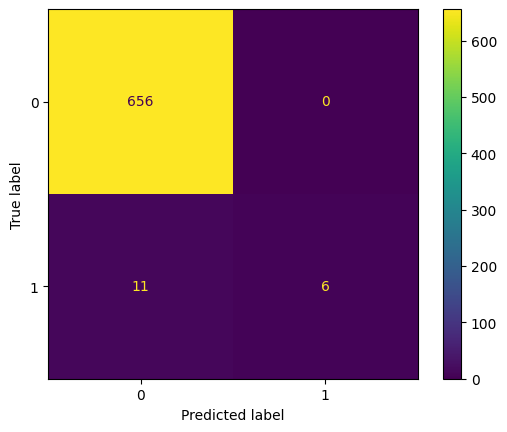

In [28]:
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
Accuracy

0.9881235154394299

In [ ]:
Precision = metrics.precision_score(actual, predicted)
Precision

1.0

In [ ]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
Sensitivity_recall

0.5454545454545454

In [ ]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
Specificity

1.0

In [ ]:
F1_score = metrics.f1_score(actual, predicted)

In [ ]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9881235154394299, 'Precision': 1.0, 'Sensitivity_recall': 0.5454545454545454, 'Specificity': 1.0, 'F1_score': 0.7058823529411764}


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

NameError: name 'y_val' is not defined

# **Model Development**

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[656,   0],
       [  5,  12]])

# **Visualize**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

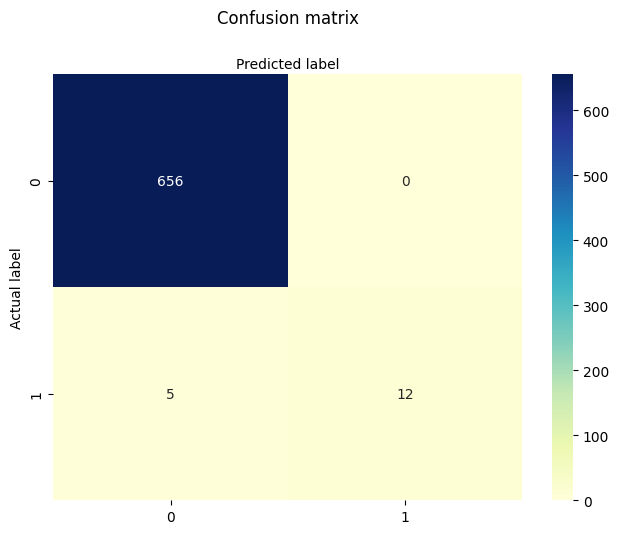

In [36]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9925705794947994
Precision: 1.0
Recall: 0.7058823529411765


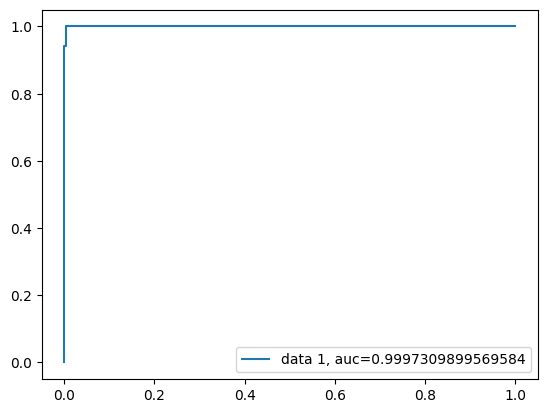

In [38]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()